<a href="https://colab.research.google.com/github/ArunKuleri/DATA-SCIENCE/blob/main/car_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow.keras.applications.vgg16 import VGG16,preprocess_input,decode_predictions

In [3]:
from tensorflow.keras.layers import Flatten,Dense
from tensorflow.keras.models import Model

In [30]:
import cv2
import numpy as np

In [4]:
model= VGG16(input_shape=(224,224,3),include_top=False,weights='imagenet')

58892288/58889256 [==============================] - 1s 0us/step


In [5]:
for layer in model.layers:
  layer.trainable=False

In [6]:
model_temp=Flatten()(model.output)

In [7]:
out_layer=Dense(5,activation='softmax')(model_temp)

In [8]:
model=Model(inputs=model.input,outputs=out_layer)

In [13]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy

In [14]:
model.compile(optimizer=Adam(),loss=SparseCategoricalCrossentropy(),metrics=['accuracy'])

In [15]:
path='/content/drive/MyDrive/cars'

In [16]:
import pathlib

In [17]:
from glob import glob

In [18]:
path_cars=pathlib.Path(path)

In [20]:
list(path_cars.glob('*/*.jpg'))

[PosixPath('/content/drive/MyDrive/cars/cross/cross (18).jpg'),
 PosixPath('/content/drive/MyDrive/cars/cross/cross (17).jpg'),
 PosixPath('/content/drive/MyDrive/cars/cross/cross (16).jpg'),
 PosixPath('/content/drive/MyDrive/cars/cross/cross (14).jpg'),
 PosixPath('/content/drive/MyDrive/cars/cross/cross (15).jpg'),
 PosixPath('/content/drive/MyDrive/cars/cross/cross (12).jpg'),
 PosixPath('/content/drive/MyDrive/cars/cross/cross (13).jpg'),
 PosixPath('/content/drive/MyDrive/cars/cross/cross (11).jpg'),
 PosixPath('/content/drive/MyDrive/cars/cross/cross (10).jpg'),
 PosixPath('/content/drive/MyDrive/cars/cross/cross (1).jpg'),
 PosixPath('/content/drive/MyDrive/cars/cross/cross (36).jpg'),
 PosixPath('/content/drive/MyDrive/cars/cross/cross (35).jpg'),
 PosixPath('/content/drive/MyDrive/cars/cross/cross (34).jpg'),
 PosixPath('/content/drive/MyDrive/cars/cross/cross (33).jpg'),
 PosixPath('/content/drive/MyDrive/cars/cross/cross (32).jpg'),
 PosixPath('/content/drive/MyDrive/cars/c

In [21]:
crossoverLi=list(path_cars.glob('cross/*.jpg'))
hatchBackLi=list(path_cars.glob('hatchBack/*.jpg'))
muvLi=list(path_cars.glob('muv/*.jpg'))
sedan=list(path_cars.glob('sedan/*.jpg'))
suv=list(path_cars.glob('suv/*.jpg'))

In [24]:
len(hatchBackLi)

19

In [25]:
car_dict ={'crossover':crossoverLi, 'hatchBack':hatchBackLi, 'muv':muvLi, 
           "sedan":sedan, 'suv':suv}

In [26]:
car_class= {'crossover':0, 'hatchBack':1, 'muv':2,
            'sedan':3, 'suv':4}

In [27]:
car_img=[]

In [31]:
for i in car_dict:
  car_name=i
  car_list= car_dict[car_name]
  for path in car_list:
    img=cv2.imread(str(path))
    img=cv2.resize(img,(224,224))
    img=img/255
    img=np.array(img)
    car_img.append([img,car_class[car_name]])

In [33]:
x=[]
y=[]
car_img

[[array([[[1., 1., 1.],
          [1., 1., 1.],
          [1., 1., 1.],
          ...,
          [1., 1., 1.],
          [1., 1., 1.],
          [1., 1., 1.]],
  
         [[1., 1., 1.],
          [1., 1., 1.],
          [1., 1., 1.],
          ...,
          [1., 1., 1.],
          [1., 1., 1.],
          [1., 1., 1.]],
  
         [[1., 1., 1.],
          [1., 1., 1.],
          [1., 1., 1.],
          ...,
          [1., 1., 1.],
          [1., 1., 1.],
          [1., 1., 1.]],
  
         ...,
  
         [[1., 1., 1.],
          [1., 1., 1.],
          [1., 1., 1.],
          ...,
          [1., 1., 1.],
          [1., 1., 1.],
          [1., 1., 1.]],
  
         [[1., 1., 1.],
          [1., 1., 1.],
          [1., 1., 1.],
          ...,
          [1., 1., 1.],
          [1., 1., 1.],
          [1., 1., 1.]],
  
         [[1., 1., 1.],
          [1., 1., 1.],
          [1., 1., 1.],
          ...,
          [1., 1., 1.],
          [1., 1., 1.],
          [1., 1., 1.]]]), 0], [a

In [34]:
for pics,label in car_img:
  x.append(pics)
  y.append(label)

In [35]:
x = np.array(x)
y = np.array(y)

In [36]:
x.shape,y.shape

((358, 224, 224, 3), (358,))

In [39]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

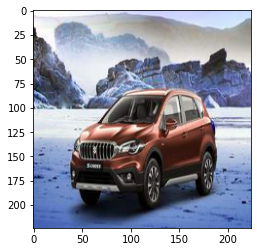

In [42]:
plt.imshow(x[10])

array([[[[1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         ...,
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ]],

        [[1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         ...,
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ]],

        [[1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         ...,
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ]],

        ...,

        [[1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ]

In [44]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y, test_size = .28, random_state =1)

In [45]:
xtrain.shape

(257, 224, 224, 3)

In [46]:
ytest.shape

(101,)

In [48]:
xtrain=xtrain.reshape(257, 224, 224, 3)
ytest=ytest.reshape(101)

In [49]:
hist=model.fit(xtrain,ytrain,epochs=5,batch_size=100,validation_data=(xtest,ytest))

Epoch 1/5
3/3 [==============================] - 185s 65s/step - loss: 1.9348 - accuracy: 0.2434 - val_loss: 0.7239 - val_accuracy: 0.8020
Epoch 2/5
3/3 [==============================] - 178s 64s/step - loss: 0.8041 - accuracy: 0.8466 - val_loss: 0.3300 - val_accuracy: 0.8614
Epoch 3/5
3/3 [==============================] - 179s 64s/step - loss: 0.2629 - accuracy: 0.9132 - val_loss: 0.0654 - val_accuracy: 1.0000
Epoch 4/5
3/3 [==============================] - 184s 67s/step - loss: 0.0419 - accuracy: 0.9943 - val_loss: 0.0553 - val_accuracy: 1.0000
Epoch 5/5
3/3 [==============================] - 179s 65s/step - loss: 0.0422 - accuracy: 1.0000 - val_loss: 0.0381 - val_accuracy: 1.0000


In [53]:
y_pred=model.predict(xtest)
y_pred

array([[5.62163086e-06, 2.03039381e-05, 3.52038711e-04, 5.32264123e-03,
        9.94299412e-01],
       [2.06959996e-07, 5.28394651e-07, 5.83426663e-05, 9.99769270e-01,
        1.71640771e-04],
       [8.82852689e-08, 1.50833171e-06, 5.54617109e-05, 3.67872010e-04,
        9.99575078e-01],
       [5.43117021e-05, 7.95905289e-05, 4.91619017e-03, 9.85645711e-01,
        9.30419751e-03],
       [1.92031694e-05, 1.68366561e-04, 3.38830543e-03, 2.29653600e-03,
        9.94127631e-01],
       [5.62163086e-06, 2.03039381e-05, 3.52038711e-04, 5.32264123e-03,
        9.94299412e-01],
       [4.27615123e-06, 2.91837868e-03, 1.47408748e-03, 9.94053543e-01,
        1.54978328e-03],
       [5.41530972e-06, 3.39184517e-05, 9.97202277e-01, 1.11009553e-03,
        1.64834119e-03],
       [3.98361499e-06, 1.75906457e-02, 7.31228851e-04, 9.81374979e-01,
        2.99153908e-04],
       [4.94804226e-05, 1.31444598e-03, 1.56920310e-02, 1.29568763e-02,
        9.69987154e-01],
       [1.72177097e-04, 2.9209

In [54]:
ht=hist.history
ht

{'accuracy': [0.32684823870658875,
  0.8482490181922913,
  0.9338521361351013,
  0.9961089491844177,
  1.0],
 'loss': [1.9144984483718872,
  0.7391119003295898,
  0.22554133832454681,
  0.04099385067820549,
  0.04593466967344284],
 'val_accuracy': [0.801980197429657, 0.8613861203193665, 1.0, 1.0, 1.0],
 'val_loss': [0.7238767743110657,
  0.32997027039527893,
  0.06543722003698349,
  0.05525817349553108,
  0.03811649978160858]}

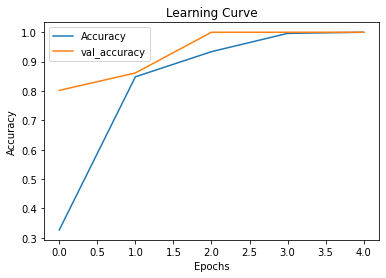

In [57]:
plt.plot(ht['accuracy'],label='Accuracy')
plt.plot(ht['val_accuracy'],label='val_accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Learning Curve')
plt.legend()

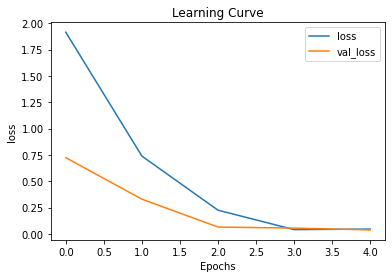

In [58]:
plt.plot(ht['loss'],label='loss')
plt.plot(ht['val_loss'],label='val_loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.title('Learning Curve')
plt.legend()

In [67]:
model.save('cars.h5')